<a href="https://colab.research.google.com/github/HONAJIPHAD/capstion-project-of-telecom-churn/blob/main/Copy_of_Telecom_Churn_Analysis_Commit_2_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Orange S.A., formerly France Télécom S.A., is a French multinational telecommunications corporation. The Orange Telecom's Churn Dataset, consists of cleaned customer activity data (features), along with a churn label specifying whether a customer canceled the subscription.

## <b> Explore and analyze the data to discover key factors responsible for customer churn and come up with ways/recommendations to ensure customer retention. </b>

###Let us import the liabreries and .csv file into Notebook, after that let us perform basic operations such as info and describe

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# Importing the dataset
df = pd.read_csv('/content/drive/MyDrive/New folder/New folder/Telecom Churn.csv')

#Understand More About The Data

In [ ]:
df.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State                   3333 non-null   object 
 1   Account length          3333 non-null   int64  
 2   Area code               3333 non-null   int64  
 3   International plan      3333 non-null   object 
 4   Voice mail plan         3333 non-null   object 
 5   Number vmail messages   3333 non-null   int64  
 6   Total day minutes       3333 non-null   float64
 7   Total day calls         3333 non-null   int64  
 8   Total day charge        3333 non-null   float64
 9   Total eve minutes       3333 non-null   float64
 10  Total eve calls         3333 non-null   int64  
 11  Total eve charge        3333 non-null   float64
 12  Total night minutes     3333 non-null   float64
 13  Total night calls       3333 non-null   int64  
 14  Total night charge      3333 non-null   

In [ ]:
df.describe()

,Account length,Area code,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


In [ ]:
#Printing the count of true and false in 'churn' feature
print(df.Churn.value_counts())

False    2850
True      483
Name: Churn, dtype: int64


In [ ]:
numeric_features = df.describe().columns
numeric_features

Index(['Account length', 'Area code', 'Number vmail messages',
       'Total day minutes', 'Total day calls', 'Total day charge',
       'Total eve minutes', 'Total eve calls', 'Total eve charge',
       'Total night minutes', 'Total night calls', 'Total night charge',
       'Total intl minutes', 'Total intl calls', 'Total intl charge',
       'Customer service calls'],
      dtype='object')

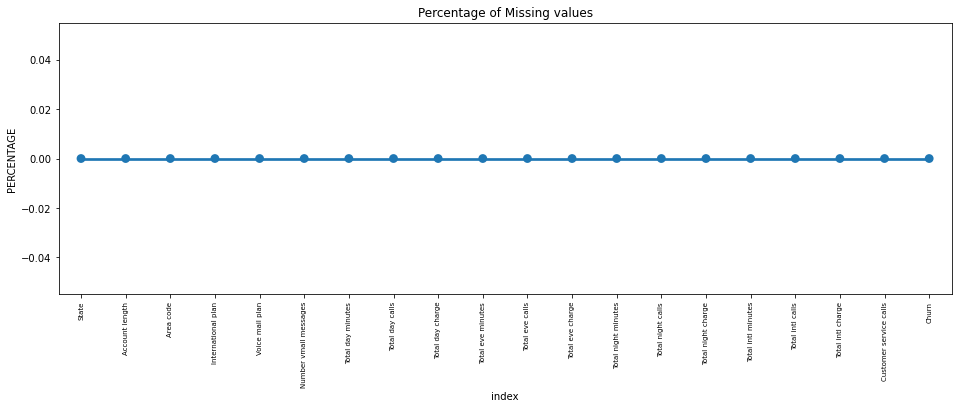

In [ ]:
missing = pd.DataFrame((df.isnull().sum())*100/df.shape[0]).reset_index()
plt.figure(figsize=(16,5))
ax = sns.pointplot('index',0,data=missing)
plt.xticks(rotation =90,fontsize =7)
plt.title("Percentage of Missing values")
plt.ylabel("PERCENTAGE")
plt.show()

##Checking for Missing And Duplicate values

In [5]:
#check for count of missing values in each column.
df.isna().sum()
df.isnull().sum()
#as we see there are no missing values present in nay column.

State                     0
Account length            0
Area code                 0
International plan        0
Voice mail plan           0
Number vmail messages     0
Total day minutes         0
Total day calls           0
Total day charge          0
Total eve minutes         0
Total eve calls           0
Total eve charge          0
Total night minutes       0
Total night calls         0
Total night charge        0
Total intl minutes        0
Total intl calls          0
Total intl charge         0
Customer service calls    0
Churn                     0
dtype: int64

In [6]:
# Checking Duplicate Values
len(df[df.duplicated()])

0

As of now There are 3333 rows and 20 columns in above dataset.

out of which there are 1 boolean data type i.e churn

8 float data type,

8integer data type,

3 object data type i.e catagarical value are there.

There are no missing value present so no need to do the missing value imputation,

And also there are no duplicate value present.

#Exploratory Data Analysis Of The Data Set

Analyzing What The Dependent Variable Said To Us i.e 'CHURN'.

In [7]:
#Printing the count of true and false in 'churn' feature
print(df.Churn.value_counts())

False    2850
True      483
Name: Churn, dtype: int64


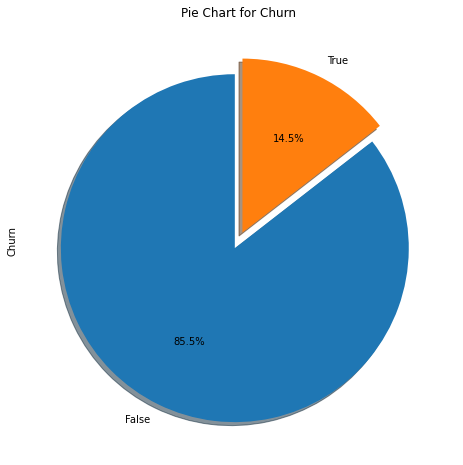

In [8]:
#To get the pie chart to analyze churn
df ['Churn'].value_counts().plot.pie(explode=[0.05,0.05], autopct='%1.1f%%',  startangle=90,shadow=True, figsize=(8,8))
plt.title('Pie Chart for Churn')
plt.show()

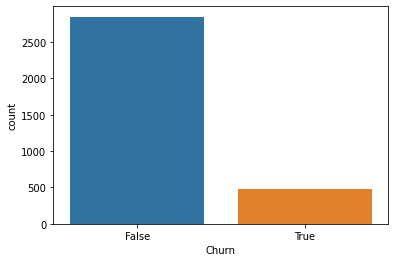

In [9]:
#let's see churn by using countplot
sns.countplot(x=df.Churn)

After analyzing the churn column, we had little to say like almost 15% of customers have churned. let's see what other features say to us and what relation we get after correlated with churn

#Analyzing State Column

In [10]:
#printing the unique value of sate column
df['State'].nunique()

51

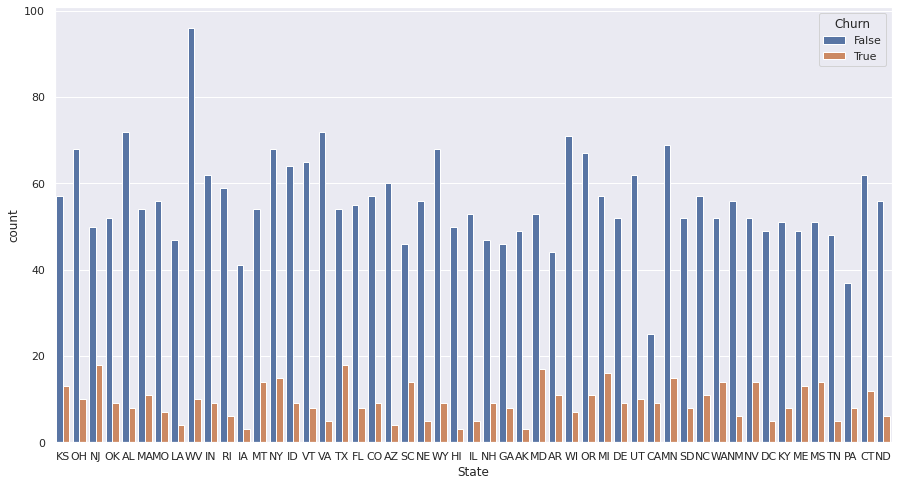

In [11]:
#Comparison churn with state by using countplot
sns.set(style="darkgrid")
plt.figure(figsize=(15,8))
ax = sns.countplot(x='State', hue="Churn", data=df)
plt.show()

As soon as we get the percentage let us see top 10 states who are moving towards churn

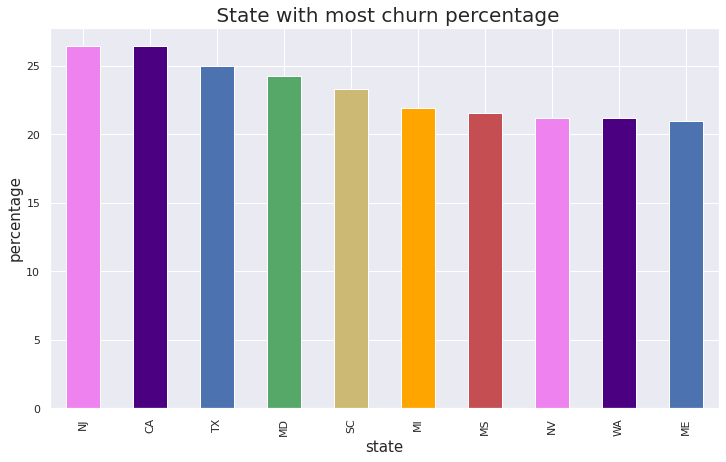

In [12]:
plt.rcParams['figure.figsize'] = (12, 7)
color = plt.cm.copper(np.linspace(0, 0.5, 20))
((df.groupby(['State'])['Churn'].mean())*100).sort_values(ascending = False).head(10).plot.bar(color = ['violet','indigo','b','g','y','orange','r'])
plt.title(" State with most churn percentage", fontsize = 20)
plt.xlabel('state', fontsize = 15)
plt.ylabel('percentage', fontsize = 15)
plt.show()

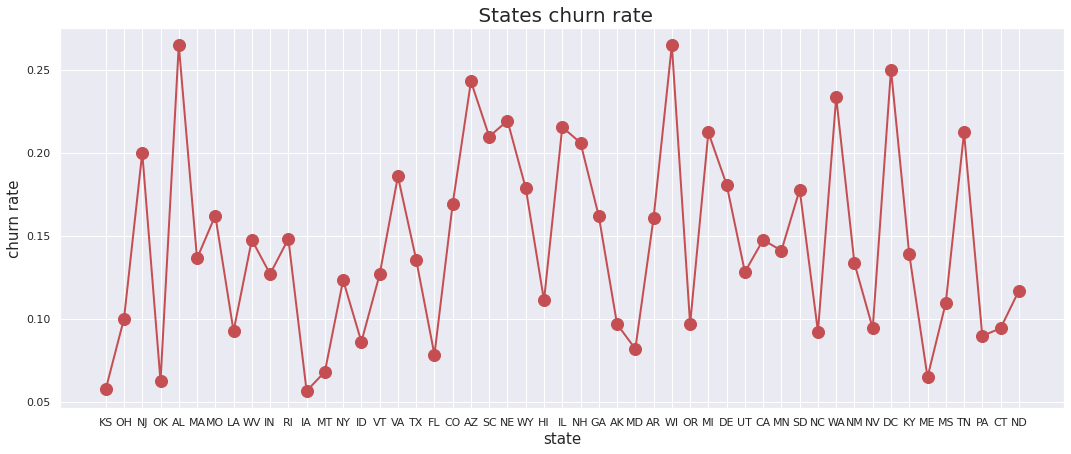

In [13]:
s1=df['State'].unique()
s2=df.groupby(['State'])['Churn'].mean()

plt.rcParams['figure.figsize'] = (18, 7)

plt.plot(s1,s2,color='r', marker='o', linewidth=2, markersize=12)

plt.title(" States churn rate", fontsize = 20)
plt.xlabel('state', fontsize = 15)
plt.ylabel('churn rate', fontsize = 15)
plt.show()

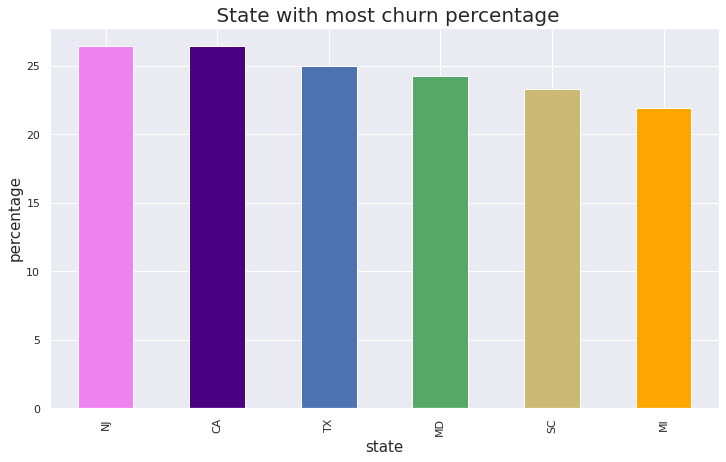

In [14]:
plt.rcParams['figure.figsize'] = (12, 7)
color = plt.cm.copper(np.linspace(0, 0.5, 20))
((df.groupby(['State'])['Churn'].mean())*100).sort_values(ascending = False).head(6).plot.bar(color = ['violet','indigo','b','g','y','orange','r'])
plt.title(" State with most churn percentage", fontsize = 20)
plt.xlabel('state', fontsize = 15)
plt.ylabel('percentage', fontsize = 15)
plt.show()

In [15]:
#calculate State vs Churn percentage
State_data = pd.crosstab(df["State"],df["Churn"])
State_data['Percentage_Churn'] = State_data.apply(lambda x : x[1]*100/(x[0]+x[1]),axis = 1)
print(State_data)

Churn  False  True  Percentage_Churn
State                               
AK        49     3          5.769231
AL        72     8         10.000000
AR        44    11         20.000000
AZ        60     4          6.250000
CA        25     9         26.470588
CO        57     9         13.636364
CT        62    12         16.216216
DC        49     5          9.259259
DE        52     9         14.754098
FL        55     8         12.698413
GA        46     8         14.814815
HI        50     3          5.660377
IA        41     3          6.818182
ID        64     9         12.328767
IL        53     5          8.620690
IN        62     9         12.676056
KS        57    13         18.571429
KY        51     8         13.559322
LA        47     4          7.843137
MA        54    11         16.923077
MD        53    17         24.285714
ME        49    13         20.967742
MI        57    16         21.917808
MN        69    15         17.857143
MO        56     7         11.111111
M

In [18]:
#show the most churn state of top 10 by acending the above list
df.groupby(['State'])['Churn'].mean().sort_values(ascending = False).head(10)

State
NJ    0.264706
CA    0.264706
TX    0.250000
MD    0.242857
SC    0.233333
MI    0.219178
MS    0.215385
NV    0.212121
WA    0.212121
ME    0.209677
Name: Churn, dtype: float64

There is 51 unique state present who have different churn rate.

From the above analysis CA, NJ, TX, MD, SC, MI are the ones who have a higher churn rate of more than 21.

The reason for this churn rate from a particular state may be due to the low coverage of the cellular network.